In [1]:
from pyforest import *

In [38]:
data=pd.read_csv('movie_metadata.csv')

<IPython.core.display.Javascript object>

In [39]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [40]:
data.shape

(5043, 28)

In [41]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [42]:
data=data[['director_name','actor_1_name','actor_2_name','actor_3_name','title_year','movie_title','genres']]

In [43]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,title_year,movie_title,genres
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,2015.0,Spectre,Action|Adventure|Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,2012.0,The Dark Knight Rises,Action|Thriller
4,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [44]:
data['title_year'].value_counts().sort_values()

1920.0      1
1944.0      1
1943.0      1
1958.0      1
1950.0      1
         ... 
2010.0    230
2013.0    237
2006.0    239
2014.0    252
2009.0    260
Name: title_year, Length: 91, dtype: int64

In [45]:
data['title_year'].sort_values(ascending=False).head(50)

2366    2016.0
3817    2016.0
1367    2016.0
1742    2016.0
519     2016.0
380     2016.0
108     2016.0
106     2016.0
3129    2016.0
942     2016.0
3433    2016.0
2384    2016.0
2840    2016.0
98      2016.0
367     2016.0
3429    2016.0
65      2016.0
92      2016.0
3199    2016.0
1752    2016.0
4211    2016.0
567     2016.0
2613    2016.0
3112    2016.0
1071    2016.0
2238    2016.0
204     2016.0
2107    2016.0
73      2016.0
1196    2016.0
1944    2016.0
2848    2016.0
2404    2016.0
970     2016.0
3967    2016.0
154     2016.0
150     2016.0
163     2016.0
2892    2016.0
4717    2016.0
2213    2016.0
4012    2016.0
3870    2016.0
1733    2016.0
2181    2016.0
1029    2016.0
137     2016.0
2178    2016.0
3544    2016.0
1427    2016.0
Name: title_year, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='title_year', ylabel='count'>

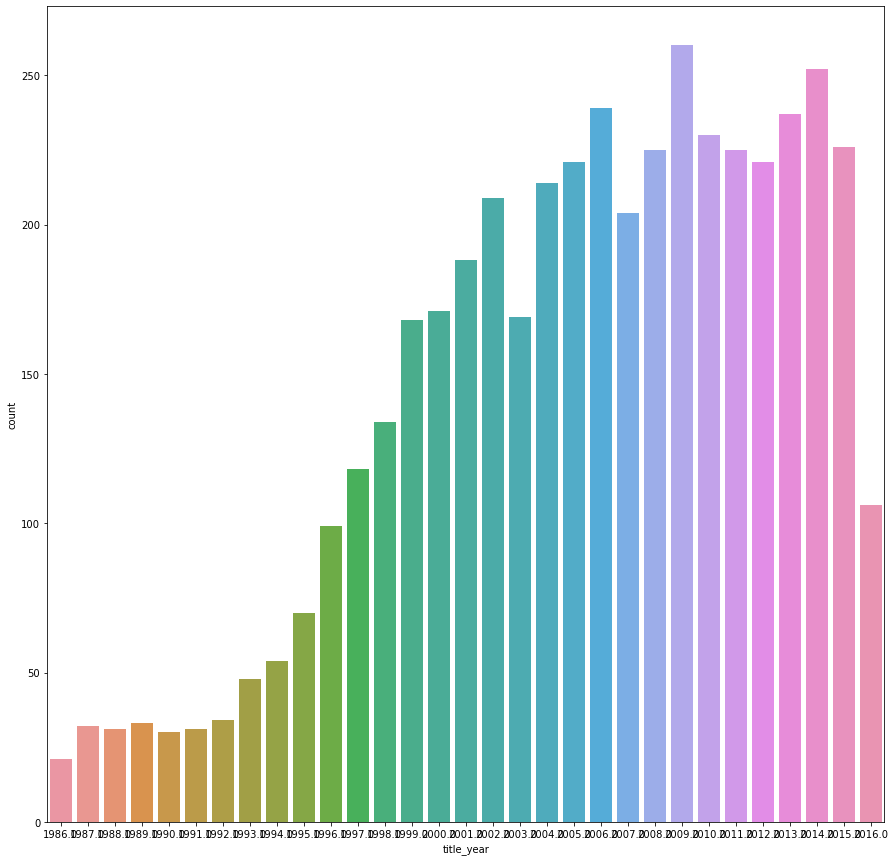

In [46]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,15))
sns.countplot(data['title_year'].sort_values(ascending=False).head(4500),orient='h')


In [47]:
data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
title_year       108
movie_title        0
genres             0
dtype: int64

In [48]:
data.fillna('unknown',inplace=True)

In [49]:
data.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
title_year       0
movie_title      0
genres           0
dtype: int64

In [50]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,title_year,movie_title,genres
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,2015.0,Spectre,Action|Adventure|Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,2012.0,The Dark Knight Rises,Action|Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,unknown,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [51]:
for i in data.columns:
    if i!='title_year':
       data[i]=data[i].apply(lambda x:x.replace('|',' '))

In [52]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,title_year,movie_title,genres
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,2009.0,Avatar,Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,2007.0,Pirates of the Caribbean: At World's End,Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,2015.0,Spectre,Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,2012.0,The Dark Knight Rises,Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,unknown,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [53]:
data['movie_title']=data['movie_title'].apply(lambda x:x.lower())

In [54]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,title_year,movie_title,genres
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,2009.0,avatar,Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,2007.0,pirates of the caribbean: at world's end,Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,2015.0,spectre,Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,2012.0,the dark knight rises,Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,unknown,star wars: episode vii - the force awakens ...,Documentary


In [55]:
data['movie_title'][3]

'the dark knight rises\xa0'

In [56]:
data['movie_title']=data['movie_title'].apply(lambda x:x[:-1])

In [57]:
data['movie_title'][3]

'the dark knight rises'

In [58]:
data.to_csv('movie_data1.csv',index=False)